# Morfolojik Operatörler OpenCV Kütüphanesi ile Uygulama

## OpenCV (Open Source Computer Vision Library)

OpenCV, gerçek zamanlı bilgisayar görüsü uygulamalarında kullanılan açık kaynaklı bir kütüphanedir.

### Özellikler

- Aslen **C++** diliyle yazılmıştır.
- **Python**, **Java** ve **MATLAB** için de bağları bulunmaktadır.

### Python-OpenCV

Python-OpenCV, orijinal **C/C++** kodunun etrafındaki bir **sarmalayıcı (wrapper)**dır.
Bu nedenle, OpenCV'de Python'dan bir fonksiyon çağrıldığında, gerçekte **C/C++ kaynağı** çalıştırılmaktadır.


* Python `OpenCV` Kütüphanesinin kurulumu;

In [14]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
print(cv2.__version__)

4.11.0


## OpenCV ile Görüntü Okuma

`cv2.IMREAD` fonksiyonu, bir görüntüyü okuyup **NumPy array** olarak kaydeder.

### Okuma Modları

- `cv2.IMREAD_UNCHANGED (-1)`: Görüntüyü orijinal haliyle okur (şeffaflık dahil).
- `cv2.IMREAD_GRAYSCALE (0)`: Görüntüyü gri tonlamalı (siyah-beyaz) okur.
- `cv2.IMREAD_COLOR (1)`: Görüntüyü renkli okur (şeffaflık ihmal edilir).

**Not:** Varsayılan olarak `cv2.IMREAD_COLOR` kullanılır. Bu nedenle, şeffaflık içeren bir PNG dosyası okunsa bile şeffaflık kanalı göz ardı edilir.

### OpenCV'de Renk Formatı

OpenCV, renkli görüntüleri **BGR (Blue, Green, Red)** formatında okur.
Yani, standart **RGB (Red, Green, Blue)** yerine mavi bileşeni önce gelir.

In [20]:
I = cv2.imread('./images/peppers.png', cv2.IMREAD_UNCHANGED) # I = cv2.imread('./images/peppers.png', -1)

In [4]:
print("Image Properties peppers.png")
print("Type: " , type(I))
print("Dimension: " , I.ndim)
print("Number of Pixels: " , I.size)
print("Shape: " , I.shape)
print("Data Type: " , I.dtype)

Image Properties peppers.png
Type:  <class 'numpy.ndarray'>
Dimension:  3
Number of Pixels:  589824
Shape:  (384, 512, 3)
Data Type:  uint8


In [16]:
I2 = cv2.imread('./images/peppers.png', cv2.IMREAD_GRAYSCALE) # I = cv2.imread('./images/peppers.png', 0)

In [6]:
print("Image Properties peppers.png (cv2.IMREAD_GRAYSCALE)")
print("Type: " , type(I2))
print("Dimension: " , I2.ndim)
print("Number of Pixels: " , I2.size)
print("Shape: " , I2.shape)
print("Data Type: " , I2.dtype)

Image Properties peppers.png (cv2.IMREAD_GRAYSCALE)
Type:  <class 'numpy.ndarray'>
Dimension:  2
Number of Pixels:  196608
Shape:  (384, 512)
Data Type:  uint8


### Gri ve Renkli Görüntülerin Matris Yapısı

- **Gri görüntülerin matris boyutu 2D'dir**, çünkü her piksel yalnızca tek bir parlaklık değeri içerir (0-255 arası bir gri ton değeri).
- **Renkli görüntüler ise 3D bir matris yapısına sahiptir**, çünkü her piksel **üç kanal içerir**: **Kırmızı (Red), Yeşil (Green) ve Mavi (Blue)**.

#### RGB Renk Uzayı

RGB renk uzayı, **üç ayrı renk kanalından (R, G, B) oluşur**.
Her piksel bu üç değeri içerdiğinde tam renkli bir görüntü oluşur.

In [17]:
I3 = cv2.imread('./images/peppers.png', cv2.IMREAD_COLOR) # I = cv2.imread('./images/peppers.png', 1)

In [8]:
print("Image Properties peppers.png (cv2.IMREAD_COLOR)")
print("Type: " , type(I2))
print("Dimension: " , I3.ndim)
print("Number of Pixels: " , I3.size)
print("Shape: " , I3.shape)
print("Data Type: " , I3.dtype)

Image Properties peppers.png (cv2.IMREAD_COLOR)
Type:  <class 'numpy.ndarray'>
Dimension:  3
Number of Pixels:  589824
Shape:  (384, 512, 3)
Data Type:  uint8


In [18]:
I_copy = I.copy() # Görüntünün kopyasını alma

print("Image Properties peppers.png (I.copy())")
print("Type: " , type(I_copy))
print("Dimension: " , I_copy.ndim)
print("Number of Pixels: " , I_copy.size)
print("Shape: " , I_copy.shape)
print("Data Type: " , I_copy.dtype)

Image Properties peppers.png (I.copy())
Type:  <class 'numpy.ndarray'>
Dimension:  3
Number of Pixels:  589824
Shape:  (384, 512, 3)
Data Type:  uint8


### Görüntü Boyutları ve NumPy Dizileri

Bir görüntünün boyutu **(1920, 1080)** olarak verildiğinde:
- **1920 sütun** ve **1080 satır** içerdiği anlamına gelir.
- Yani, **(genişlik, yükseklik) → (widht, height)** olarak ifade edilir.

#### NumPy Dizilerinde Boyutlar

- Bir **2D NumPy dizisinin ilk boyutu**, dizinin **satırlarını** temsil eder.
- Burada her satır, görüntünün **yüksekliğini (height)** belirtir.

Özetle, bir görüntü **(yükseklik, genişlik) = (y, x)** şeklinde tanımlanır.


## Görüntü Gösterme

In [ ]:
cv2.imshow("Image Properties peppers.png", I)
cv2.imshow("Image Properties peppers.png (cv2.IMREAD_GRAYSCALE)", I2)
cv2.imshow("Image Properties peppers.png (cv2.IMREAD_COLOR)", I3)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Görüntü gösterme (Matplotlib Kullanarak)
* OpenCV'de renkli görüntüler **BGR (Blue, Green, Red)** şeklinde okunur.
* Matplotlib, **RGB (Red, Green, Blue)** modunda görüntüler.

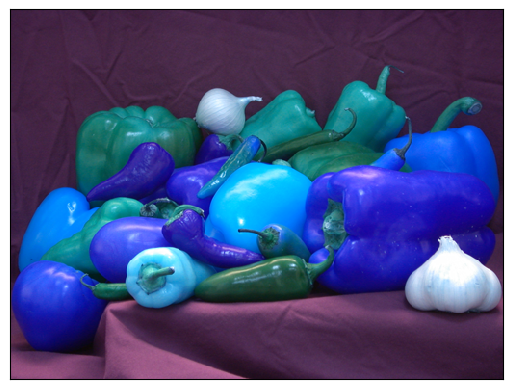

In [24]:
plt.figure()
plt.title('Image Peppers Orj')
plt.imshow(I)
plt.close()

plt.xticks([]), plt.yticks([]) # eksenleri kaldırır

# Gri tonlu veya binary görüntüleri göstermek için aşağıdaki kodlar kullanılabilir.
plt.imshow(I, cmap='Greys',  interpolation='nearest')
plt.imshow(I, cmap='binary', interpolation='nearest')



## Görüntüde Piksel Değerlerine Erişim

In [31]:
px = I[50,50,:]
px_blue=I[50,50,0]
print(px)
print(px_blue)

[71 39 66]
71


In [34]:
cv2.imshow("Image Peppers Orj", I)

for i in range(50):
    for j in range(50):
        I_copy[i,j] = [255,255,255]

cv2.imshow('Image Peppers with white area',I_copy)

for i in range(51,101):
    for j in range(50):
        I_copy[i,j] = [0,0,0]

cv2.imshow('Image Peppers with black and white area',I_copy)

cv2.waitKey(0)
cv2.destroyAllWindows()